# Project 1 Final

In [241]:
import plotly.express as px
import panel as pn
import pandas as pd
import quandl
import os
from pathlib import Path
from dotenv import load_dotenv
from MCForecastTools import MCSimulation
import datetime as dt
import numpy as np

import hvplot.pandas
import plotly.express as px

#%matplotlib inline

In [242]:
inflation_projection = quandl.get("FRED/PCECTPIMD")
inflation_projection

,Value
Date,
2021-01-01,3.4
2022-01-01,2.1
2023-01-01,2.2


In [243]:
inflation_projection_plot = inflation_projection.hvplot.line()
inflation_projection_plot

:Curve   [Date]   (Value)

In [244]:
inflation_hist_df = quandl.get("RATEINF/CPI_USA")
inflation_hist_df

,Value
Date,
1913-01-31,9.800
1913-02-28,9.800
1913-03-31,9.800
1913-04-30,9.800
1913-05-31,9.700
...,...
2021-02-28,263.014
2021-03-31,264.877
2021-04-30,267.054


In [245]:
#dxy_var_hist_df = dxy_hist_df['Close'].var()
#dxy_var_hist_df
inflation_hist__df = inflation_hist_df[['Value']]
inflation_hist_pct_df = inflation_hist__df.pct_change()
inflation_hist_pct_df.dropna(inplace=True)
inflation_hist_pct_df

,Value
Date,
1913-02-28,0.000000
1913-03-31,0.000000
1913-04-30,0.000000
1913-05-31,-0.010204
1913-06-30,0.010309
...,...
2021-02-28,0.005474
2021-03-31,0.007083
2021-04-30,0.008219


In [246]:
cumulative_returns = (1 + inflation_hist_pct_df).cumprod() - 1
cumulative_returns_plot = cumulative_returns.hvplot.line()
cumulative_returns_plot

:Curve   [Date]   (Value)

In [247]:
# import DXY history data to Pandas
dxy_hist_path = Path("dxy-price-history.csv")
dxy_hist_df = pd.read_csv(dxy_hist_path, index_col="Date", infer_datetime_format=True, parse_dates=True)
dxy_hist_df.index = pd.to_datetime(dxy_hist_df.index)

In [248]:
#import bitcoin history data to Pandas
btc_hist_path = Path("./bitcoin-price-history.csv")

btc_hist_df = pd.read_csv(btc_hist_path, index_col="Date",infer_datetime_format=True, parse_dates=True)
#btc_hist_df["Date"]=btc_hist_df["Date"].astype("datetime")
#btc_hist_df.dtypes
btc_hist_df.index = pd.to_datetime(btc_hist_df.index)
#btc_hist_df.set_index(pd.to_datetime(btc_hist_df.index))

In [249]:
# import eth history data to Pandas
eth_hist_path = Path("ethereum-price-history.csv")
eth_hist_df = pd.read_csv(eth_hist_path, index_col="Date", infer_datetime_format=True, parse_dates=True)
eth_hist_df.index = pd.to_datetime(eth_hist_df.index)

In [250]:
#dxy_var_hist_df = dxy_hist_df['Close'].var()
#dxy_var_hist_df
dxy_hist_close_df = dxy_hist_df[['Close']]
dxy_hist_pct_df = dxy_hist_close_df.pct_change()
dxy_hist_pct_df.dropna(inplace=True)
dxy_hist_pct_df

,Close
Date,
1971-08-25,0.000000
1971-08-26,0.000000
1971-08-27,0.000000
1971-08-29,0.000000
1971-08-30,0.000000
...,...
2021-07-19,0.002158
2021-07-20,0.000861
2021-07-21,-0.002366


In [251]:
# Rename the column
dxy_hist_pct_df.rename(columns = {"Close": "dxy"}, inplace = True)
dxy_hist_pct_df

,dxy
Date,
1971-08-25,0.000000
1971-08-26,0.000000
1971-08-27,0.000000
1971-08-29,0.000000
1971-08-30,0.000000
...,...
2021-07-19,0.002158
2021-07-20,0.000861
2021-07-21,-0.002366


In [252]:
cumulative_returns = (1 + dxy_hist_pct_df).cumprod() - 1
cumulative_returns_plot = cumulative_returns.hvplot.line()
cumulative_returns_plot

:Curve   [Date]   (dxy)

In [253]:
#btc_var_hist_df = btc_hist_df['Close'].var()
#btc_var_hist_df
btc_hist_close_df = btc_hist_df[['Close']]
btc_hist_pct_df = btc_hist_close_df.pct_change()
btc_hist_pct_df.dropna(inplace=True)

In [254]:
# Rename the column
btc_hist_pct_df.rename(columns = {"Close": "btc"}, inplace = True)
btc_hist_pct_df

,btc
Date,
2021-07-22,-0.034846
2021-07-21,-0.006049
2021-07-20,-0.074138
2021-07-19,0.036694
2021-07-18,0.031150
...,...
2013-07-21,-0.009308
2013-07-20,-0.015064
2013-07-19,0.031099


In [255]:
cumulative_returns = (1 + btc_hist_pct_df).cumprod() - 1
cumulative_returns_plot = cumulative_returns.hvplot.line()
cumulative_returns_plot

:Curve   [Date]   (btc)

In [256]:
#eth_var_hist_df = eth_hist_df['Close'].var()
#eth_var_hist_df
eth_hist_close_df = eth_hist_df[['Close']]
eth_hist_pct_df = eth_hist_close_df.pct_change()
eth_hist_pct_df.dropna(inplace=True)

In [257]:
# Rename the column
eth_hist_pct_df.rename(columns = {"Close": "eth"}, inplace = True)
eth_hist_pct_df

,eth
Date,
2016-07-26,-0.148242
2016-07-27,0.102132
2016-07-28,-0.007922
2016-07-29,-0.003553
2016-07-30,-0.026506
...,...
2021-07-19,-0.040577
2021-07-20,-0.020670
2021-07-21,0.116298


In [258]:
cumulative_returns = (1 + eth_hist_pct_df).cumprod() - 1
cumulative_returns_plot = cumulative_returns.hvplot.line()
cumulative_returns_plot

:Curve   [Date]   (eth)

In [259]:
# Concatenate all dataframes into one dataframe
df_daily = pd.concat([btc_hist_pct_df, eth_hist_pct_df, dxy_hist_pct_df], axis = "columns", join = "inner")
df_daily

,btc,eth,dxy
Date,,,
2021-07-22,-0.034846,0.017032,0.000755
2021-07-21,-0.006049,0.116298,-0.002366
2021-07-20,-0.074138,-0.020670,0.000861
2021-07-19,0.036694,-0.040577,0.002158
2021-07-18,0.031150,0.000300,0.000000
...,...,...,...
2016-07-31,0.031470,-0.048772,0.000000
2016-07-29,0.002867,-0.003553,-0.012508
2016-07-28,-0.002777,-0.007922,-0.003194


<AxesSubplot:xlabel='Date'>

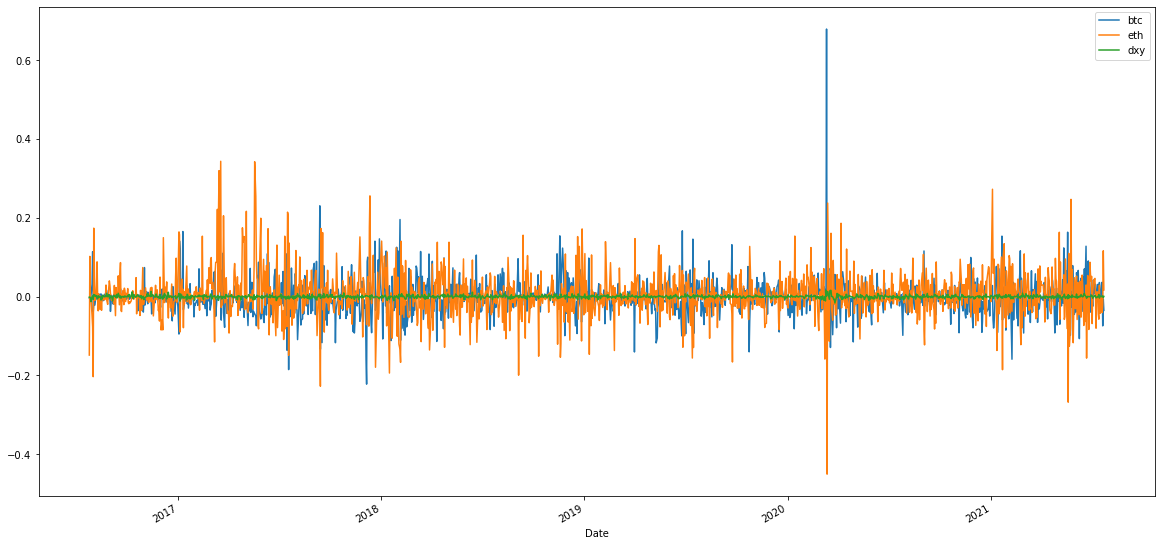

In [260]:
# Plot daily returns
df_daily.plot(figsize = (20,10))

<AxesSubplot:>

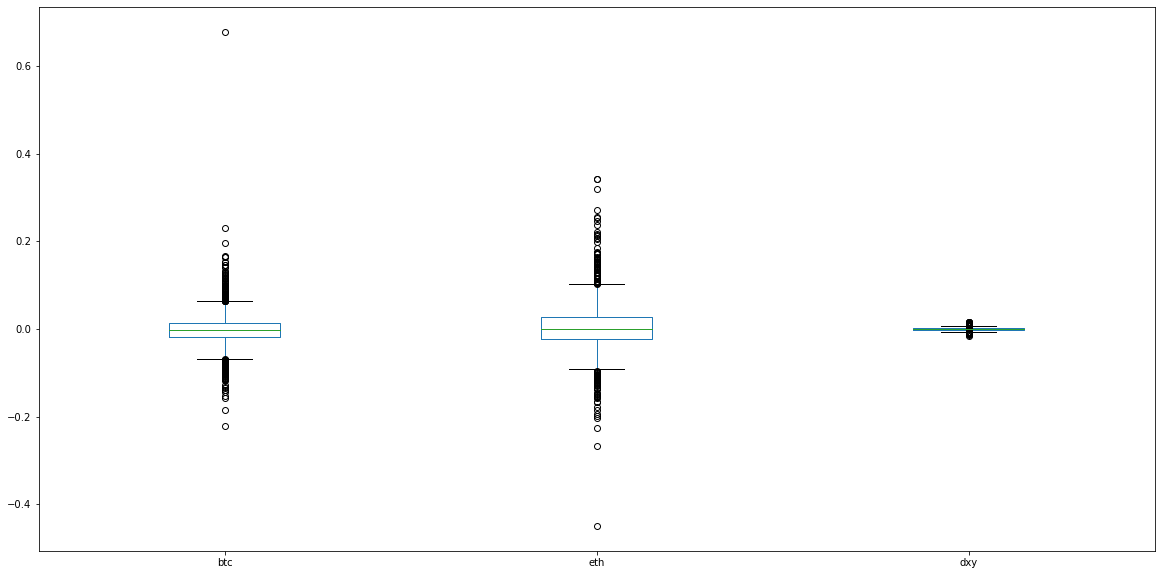

In [261]:
# Box plot to visually illustrate risk
df_daily.plot(kind = "box", figsize = (20, 10))

<AxesSubplot:xlabel='Date'>

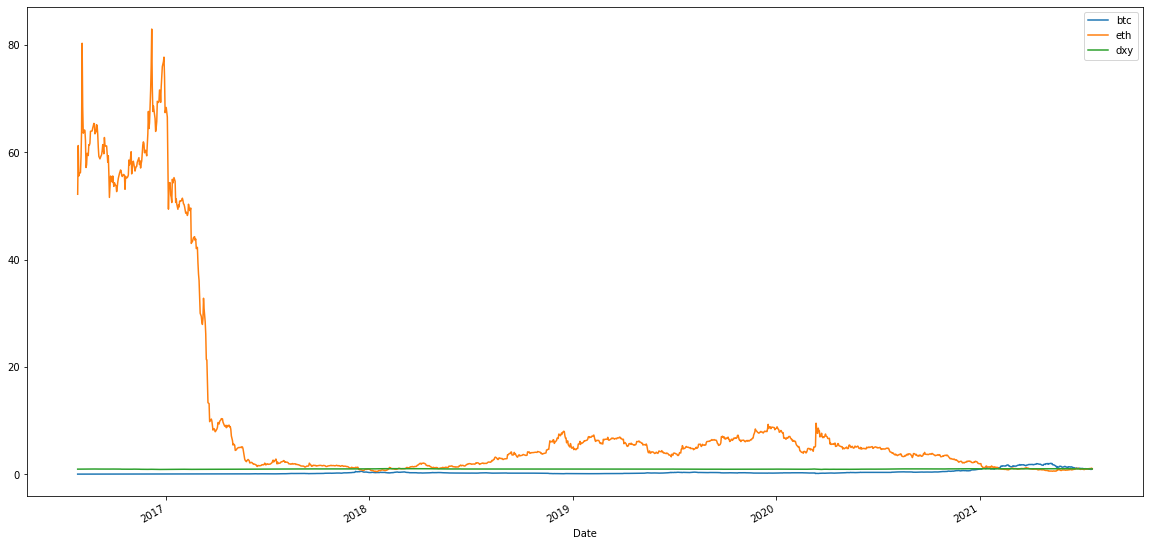

In [262]:
# Plot cumulative returns
df_cum = (1 + df_daily).cumprod()
df_cum.plot(figsize = (20, 10))

In [263]:
# Calculate std for each asset
df_daily_std = pd.DataFrame(df_daily.std()).rename(columns = {0:"std"})
df_daily_std

,std
btc,0.044547
eth,0.058294
dxy,0.003441


In [264]:
# Determine which portfolio is more risky than sp500
higher_std = df_daily_std[df_daily_std["std"] > df_daily_std.loc["dxy", "std"]]
higher_std

,std
btc,0.044547
eth,0.058294


In [265]:
# Calculate annualized std
df_annualized_std = df_daily_std*np.sqrt(252)
df_annualized_std

,std
btc,0.707157
eth,0.925395
dxy,0.054623


<AxesSubplot:xlabel='Date'>

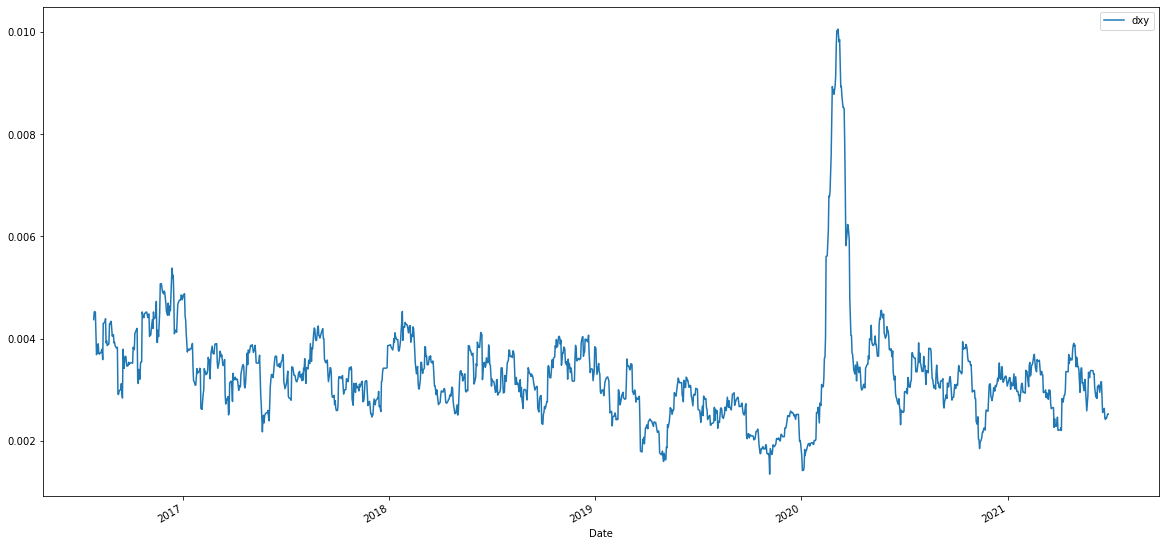

In [266]:
# Calculate and plot rolling std for dxy for 21 day period
dxy_rolling_21 = df_daily[["dxy"]].rolling(window=21).std()
dxy_rolling_21.plot(figsize = (20, 10))

In [267]:
correlation_dxy = pd.DataFrame(df_daily.corr()).loc[:, "dxy"]
correlation_dxy [correlation_dxy==correlation_dxy[correlation_dxy<1].max()]

btc   -0.039968
Name: dxy, dtype: float64

<AxesSubplot:xlabel='dxy', ylabel='btc'>

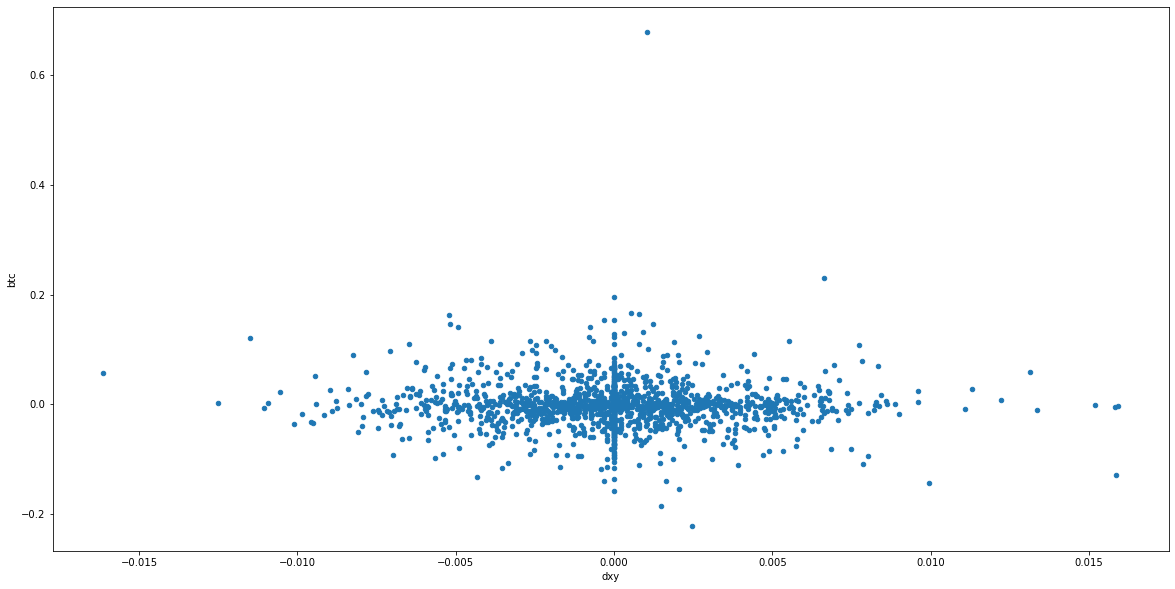

In [268]:
df_daily.plot(kind="scatter", y = "btc", x = "dxy", figsize = (20, 10))

<AxesSubplot:title={'center':'Rolling 60 day beta of Bitcoin'}, xlabel='Date'>

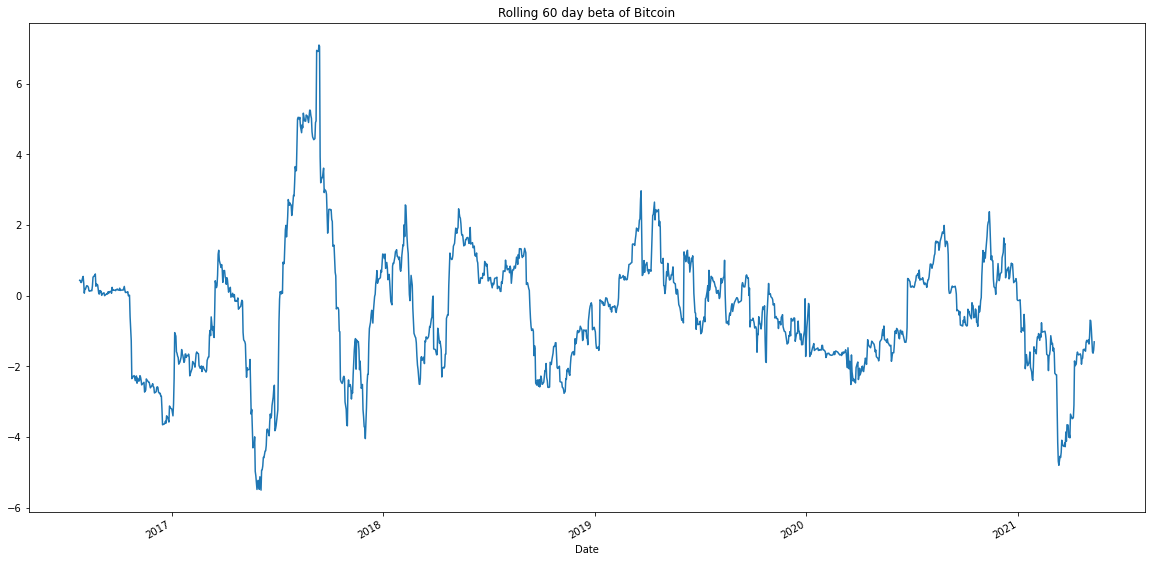

In [269]:
# Calculate Beta for bitcoin compared to dxy
rolling_covariance = df_daily['btc'].rolling(window=60).cov(df_daily['dxy'])
rolling_variance = df_daily['dxy'].rolling(window=60).var()
rolling_beta = rolling_covariance / rolling_variance
rolling_beta.plot(figsize=(20, 10), title = 'Rolling 60 day beta of Bitcoin')

<AxesSubplot:xlabel='Date'>

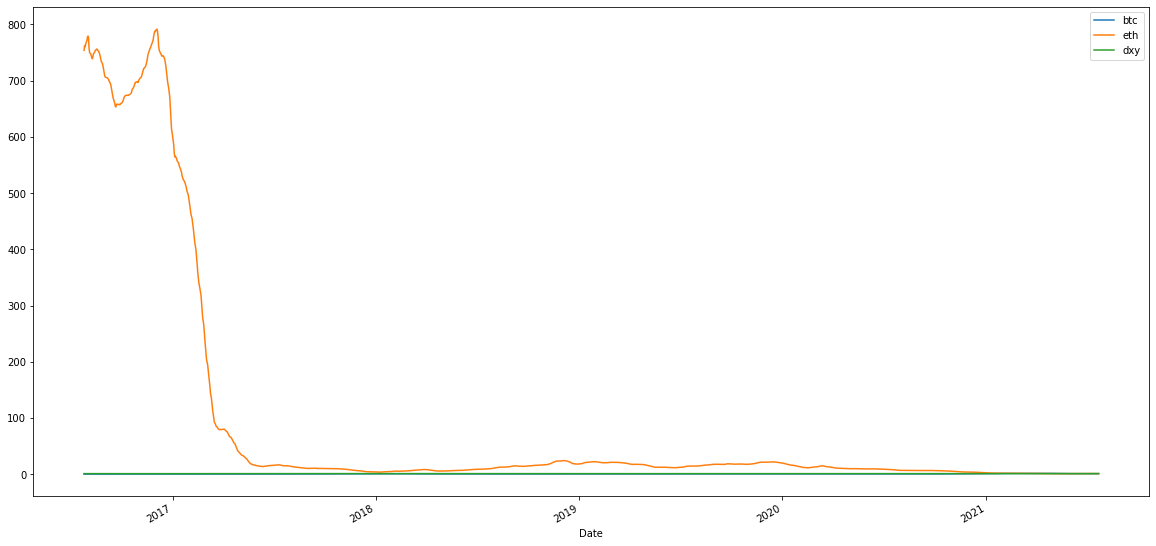

In [270]:
df_daily_ewm = df_daily.ewm(span = 21, adjust=False).mean()
(1 + df_daily_ewm).cumprod().plot(figsize=(20, 10))

In [271]:
# Annualized sharpe ratios
sharpe_ratios = df_daily.mean()*252/(df_daily.std()*np.sqrt(252))
sharpe_ratios

btc   -0.513327
eth    1.172900
dxy   -0.115942
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

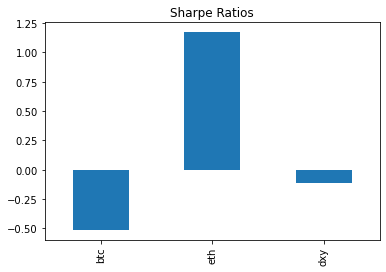

In [272]:
sharpe_ratios.plot(kind = "bar", title = "Sharpe Ratios")